In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('mobiles.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7166 entries, 0 to 7165
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   7166 non-null   object 
 1   brand                  7166 non-null   object 
 2   os                     7166 non-null   object 
 3   cpu_brand              6151 non-null   object 
 4   cpu_name               6366 non-null   object 
 5   cpu_cores              7109 non-null   float64
 6   cpu_speed              6801 non-null   float64
 7   5g                     7166 non-null   int64  
 8   nfc                    7166 non-null   int64  
 9   ir_blaster             7166 non-null   int64  
 10  ram                    7126 non-null   float64
 11  storage                7156 non-null   float64
 12  battery                7125 non-null   float64
 13  screen_size            7162 non-null   float64
 14  aspect_ratio_category  7144 non-null   object 
 15  scre

In [ ]:
# Shows count of missing values per column (NaNs). Use this to check for gaps before computing scores.
df.isna().sum()


name                        0
brand                       0
os                          0
cpu_brand                1015
cpu_name                  800
cpu_cores                  57
cpu_speed                 365
5g                          0
nfc                         0
ir_blaster                  0
ram                        40
storage                    10
battery                    41
screen_size                 4
aspect_ratio_category      22
screen_res                 21
refresh_rate                0
ppi                        25
rear_cameras                0
rear_primary                1
front_cameras               0
front_primary              49
expandable_upto             0
spec_score                  0
user_rating                 0
price                       0
dtype: int64

In [ ]:
# Compute a weighted performance score combining CPU speed, CPU cores, and a general spec score.
# Weights chosen to reflect relative importance:
# - cpu_speed: 40% (higher clock speed improves single-threaded performance)
# - cpu_cores: 20% (more cores help multi-threaded tasks)
# - spec_score: 40% (an aggregated spec metric included by dataset)
df['performance_score'] = (
    df['cpu_speed']*0.4 +
    df['cpu_cores']*0.2 +
    df['spec_score']*0.4
)


In [7]:
df['performance_score']

0       36.844
1       39.720
2       38.988
3       35.360
4       31.360
         ...  
7161    23.320
7162    25.680
7163    23.480
7164    26.480
7165    27.200
Name: performance_score, Length: 7166, dtype: float64

In [ ]:
# Compute camera score by weighting rear and front camera primary sensor values.
# Rear camera usually contributes more to overall photo quality, so it gets higher weight (70%).
df['camera_score'] = (
    df['rear_primary']*0.7 +
    df['front_primary']*0.3
)


In [10]:
df['camera_score']

0        38.00
1       143.60
2       143.60
3        39.80
4        37.40
         ...  
7161     10.60
7162     15.99
7163     10.60
7164     15.09
7165     15.99
Name: camera_score, Length: 7166, dtype: float64

In [ ]:
# Combine refresh rate and pixel density (PPI) into a display score.
# PPI (sharpness) is weighted 60% and refresh rate 40%; adjust if you prefer smoother motion to be more important.
df['display_score'] = (
    df['refresh_rate']*0.4 +
    df['ppi']*0.6
)


In [12]:
df['display_score'] 

0       278.796
1       351.198
2       355.728
3       277.428
4       192.192
         ...   
7161    264.318
7162    264.318
7163    264.318
7164    274.644
7165    349.686
Name: display_score, Length: 7166, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize selected features to [0,1] so different units don't dominate the weighted final score.
# We scale: performance_score, camera_score, display_score, battery, price.
# Note: price will be inverted later (1 - price_n) because lower price is better.
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['performance_score','camera_score','display_score','battery','price']])
scaled_df = pd.DataFrame(scaled, columns=['perf_n','cam_n','disp_n','battery_n','price_n'])

# Attach normalized columns back to the original dataframe.
df = pd.concat([df, scaled_df], axis=1)


In [14]:
df

,name,brand,os,cpu_brand,cpu_name,cpu_cores,cpu_speed,5g,nfc,ir_blaster,...,user_rating,price,performance_score,camera_score,display_score,perf_n,cam_n,disp_n,battery_n,price_n
0,samsung galaxy s24 fe 5g,samsung,android,exynos,exynos 2400e,10.0,3.11,1,1,0,...,4.00,34999.0,36.844,38.00,278.796,0.806623,0.233276,0.499648,0.114894,0.066032
1,samsung galaxy s24 ultra,samsung,android,snapdragon,snapdragon 8 gen3,8.0,3.30,1,1,0,...,4.35,84949.0,39.720,143.60,351.198,0.912436,0.907993,0.660056,0.127660,0.170867
2,samsung galaxy s25 edge,samsung,android,snapdragon,snapdragon 8elite,8.0,4.47,1,1,0,...,4.45,109999.0,38.988,143.60,355.728,0.885504,0.907993,0.670092,0.080851,0.223442
3,samsung galaxy m36 5g,samsung,android,exynos,exynos 1380,8.0,2.40,1,1,0,...,4.55,19990.0,35.360,39.80,277.428,0.752024,0.244777,0.496617,0.191489,0.034532
4,samsung galaxy m06 5g,samsung,android,mediatek,dimensity 6300,8.0,2.40,1,0,0,...,4.00,7999.0,31.360,37.40,192.192,0.604857,0.229442,0.307775,0.127660,0.009365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7161,meizu m2 note,meizu,android,helio,helio mt6753,8.0,1.30,0,0,0,...,4.30,4999.0,23.320,10.60,264.318,0.309051,0.058207,0.467571,0.046809,0.003068
7162,meizu mx5,meizu,android,helio,helio mt6795,8.0,2.20,0,0,0,...,4.15,14990.0,25.680,15.99,264.318,0.395879,0.092646,0.467571,0.048936,0.024038
7163,meizu m1 note,meizu,android,helio,helio mt6752,8.0,1.70,0,0,0,...,3.90,14499.0,23.480,10.60,264.318,0.314937,0.058207,0.467571,0.048511,0.023007
7164,meizu mx4,meizu,android,other,a17,8.0,2.20,0,0,0,...,4.35,23999.0,26.480,15.09,274.644,0.425313,0.086895,0.490449,0.046809,0.042946


In [ ]:
# Aggregate normalized scores into a single final score using specified weights:
# - perf_n: 35% (performance)
# - cam_n: 25% (camera)
# - disp_n: 20% (display)
# - battery_n: 10% (battery life)
# - price_n: 10% but inverted as (1 - price_n) so that a lower price increases the final score
df['final_score'] = (
    df['perf_n']*0.35 +
    df['cam_n']*0.25 +
    df['disp_n']*0.20 +
    df['battery_n']*0.10 +
    (1 - df['price_n'])*0.10   # lower price = better
)


In [16]:
df['final_score']

0       0.545453
1       0.774041
2       0.756684
3       0.539422
4       0.442445
          ...   
7161    0.320608
7162    0.357723
7163    0.320845
7164    0.369059
7165    0.414505
Name: final_score, Length: 7166, dtype: float64

In [17]:
best = df.sort_values('final_score', ascending=False)
best.head(10)

,name,brand,os,cpu_brand,cpu_name,cpu_cores,cpu_speed,5g,nfc,ir_blaster,...,price,performance_score,camera_score,display_score,perf_n,cam_n,disp_n,battery_n,price_n,final_score
5305,doogee v max plus,doogee,android,mediatek,dimensity 7050,8.0,2.60,1,0,0,...,62500.0,39.040,149.6,288.648,0.887417,0.946329,0.521475,0.851064,0.123751,0.824205
5803,vivo x200 ultra,vivo,android,snapdragon,snapdragon 8 elite,8.0,4.32,1,1,1,...,76990.0,41.328,155.0,354.150,0.971597,0.980832,0.666596,0.170213,0.154163,0.820191
6020,vivo x110 pro plus,vivo,android,snapdragon,snapdragon 8 gen3,8.0,3.30,1,1,1,...,99990.0,40.920,158.0,374.718,0.956586,1.000000,0.712165,0.122128,0.202435,0.819207
5073,ulefone armor 26 ultra,ulefone,android,mediatek,mediatek mt6891,8.0,2.60,1,1,0,...,63500.0,39.840,155.0,285.756,0.916851,0.980832,0.515068,0.578723,0.125850,0.814407
3380,honor magic 7 pro,honor,android,snapdragon,snapdragon 8 elite,8.0,4.32,1,1,1,...,66990.0,40.528,155.0,319.650,0.942163,0.980832,0.590160,0.163830,0.133175,0.796063
1781,motorola edge 60 ultra,motorola,android,snapdragon,snapdragon 8 elite,8.0,4.32,1,1,0,...,69990.0,40.128,158.0,332.388,0.927447,1.000000,0.618382,0.110638,0.139471,0.795399
5890,vivo x100 ultra,vivo,android,snapdragon,snapdragon 8 gen3,8.0,3.30,1,1,1,...,76990.0,40.520,155.0,319.722,0.941869,0.980832,0.590320,0.148936,0.154163,0.792403
5814,vivo x200 pro 5g,vivo,android,mediatek,dimensity 9400,8.0,3.63,1,1,1,...,94999.0,41.052,149.6,319.722,0.961442,0.946329,0.590320,0.170213,0.191960,0.788976
5961,vivo x100 pro plus,vivo,android,snapdragon,snapdragon 8 gen3,8.0,3.30,1,1,1,...,99990.0,39.720,149.6,358.536,0.912436,0.946329,0.676313,0.144681,0.202435,0.785422
3676,nokia n73 5g,nokia,android,snapdragon,snapdragon 8 gen1,8.0,3.00,1,0,0,...,46999.0,38.800,149.6,351.726,0.878587,0.946329,0.661225,0.170213,0.091218,0.784232


In [18]:
best.iloc[0]

name                      doogee v max plus
brand                                doogee
os                                  android
cpu_brand                          mediatek
cpu_name                     dimensity 7050
cpu_cores                               8.0
cpu_speed                               2.6
5g                                        1
nfc                                       0
ir_blaster                                0
ram                                    16.0
storage                               512.0
battery                             22000.0
screen_size                            6.58
aspect_ratio_category    Ultra Tall (20+:9)
screen_res                             FHD+
refresh_rate                            120
ppi                                  401.08
rear_cameras                              3
rear_primary                          200.0
front_cameras                             1
front_primary                          32.0
expandable_upto                 

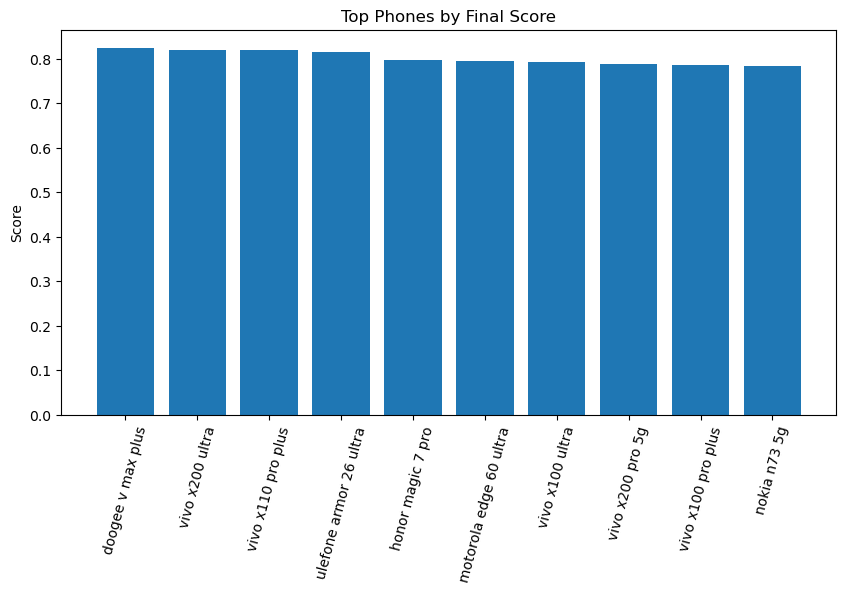

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(best['name'][:10], best['final_score'][:10])
plt.xticks(rotation=75)
plt.title("Top Phones by Final Score")
plt.ylabel("Score")
plt.show()